In [2]:
# Install required packages
!pip install sqlalchemy && pip install ipython-sql && pip install pyodbc

In [3]:
#Check ODBC driver to know what to input for Driver in next cell for SQL Connection
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client 11.0', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 18 for SQL Server', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']


In [6]:
# Connect to SQL Database
import pyodbc

conn = pyodbc.connect(
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=PERRYCPU;"        # e.g. localhost\SQLEXPRESS or an IP
    r"DATABASE=Healthcare;"
  #  r"UID=your_username;"              # for SQL auth
   # r"PWD=your_password;"              # omit UID/PWD for Windows auth
    #r"Trusted_Connection=yes # for Windows Authentication:
    r"Trusted_Connection=yes;")

In [8]:
##### Using SQLAlchemy and no warning message populates after running cell

from sqlalchemy import create_engine
import urllib

connection_string = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=PERRYCPU;"
    "DATABASE=Healthcare;"
    "Trusted_Connection=yes;"
)

params = urllib.parse.quote_plus(connection_string) ##SQLAlchemy's create_engine() expects the connection string in URI format, this sets it up
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}") ## talks to SQL server using pyodbc, creating connection to be able to query

df = pd.read_sql("SELECT * FROM dbo.DimCountry", engine) ## run query in pd.read_sql() function, passing the SQLAlchemy engine,putting results in df

In [9]:
#Import SQL query previously created

query = """
SELECT 
    a.Entity,
    a.Code,
    a.Year,
    ROUND(a.AnnualCHE, 2) AS CHE_PerCapita,
    b.CHE_outofGDP,
    ROUND(c.AnnualCHE, 2) AS AnnualCHE,
    c.GDPperCapita,
    c.EstimatedPopulation AS Population,
    j.Continent,
    d.[MortalityRate(Under5_per1000births)] AS MortalityRate,
    ROUND(e.PercentageInsured, 2) AS PercentageInsured,
    ROUND(f.TaxRevenuePerCapita, 2) AS DevelopingTaxRevenuePerCapita,
    ROUND(f.PublicExpenditurePerCapita, 2) AS DevelopingPublicExpenditurePerCapita,
    ROUND(g.GDP_SpendOnHealthcare, 2) AS GDPSpendOnHealthcarePercent,
    ROUND(h.LifeExpectancy, 2) AS LifeExpectancy,
    ROUND(i.OutOfPocket, 2) AS OutOfPocket
FROM [Healthcare].[dbo].[AnnualCHEPerCapita] a
LEFT JOIN [Healthcare].[dbo].[CHE%ofGDP%] b ON a.Code = b.Code AND a.Year = b.Year
LEFT JOIN [Healthcare].[dbo].[CHE_GDP_percapita] c ON a.Code = c.Code AND a.Year = c.Year
LEFT JOIN [Healthcare].[dbo].[ChildMortalityVsCHE] d ON a.Code = d.Code AND a.Year = d.Year
LEFT JOIN [Healthcare].[dbo].[CountryPopInsured] e ON a.Code = e.Code AND a.Year = e.Year
LEFT JOIN [Healthcare].[dbo].[DevelopingCountriesTaxRevenueHCSpend] f ON a.Code = f.Code AND a.Year = f.Year
LEFT JOIN [Healthcare].[dbo].[GDP_SpendOnHealthcare] g ON a.Code = g.Code AND a.Year = g.Year
LEFT JOIN [Healthcare].[dbo].[LifeExpectVSCHE] h ON a.Code = h.Code AND a.Year = h.Year
LEFT JOIN [Healthcare].[dbo].[OutOfPocketVS_GDP_PerCapita] i ON a.Code = i.Code AND a.Year = i.Year
RIGHT JOIN [Healthcare].[dbo].[DimCountry] j ON a.Code = j.Abbreviation
WHERE a.Code IS NOT NULL
"""
# Create dataframe and preview results
df = pd.read_sql(query, engine)
df.head()



,Entity,Code,Year,CHE_PerCapita,CHE_outofGDP,AnnualCHE,GDPperCapita,Population,Continent,MortalityRate,PercentageInsured,DevelopingTaxRevenuePerCapita,DevelopingPublicExpenditurePerCapita,GDPSpendOnHealthcarePercent,LifeExpectancy,OutOfPocket
0,Afghanistan,AFG,2006,113.75,10.62,113.75,1077.761597,26433058,Asia,10.410000,NaN,NaN,NaN,0.50,58.83,76.82
1,Afghanistan,AFG,2009,148.12,9.82,148.12,1519.692871,28394806,Asia,9.170000,NaN,NaN,NaN,0.53,60.48,72.78
2,Afghanistan,AFG,2012,151.92,7.90,151.92,1914.774170,31161378,Asia,8.030001,NaN,NaN,NaN,0.34,62.05,74.49
3,Afghanistan,AFG,2015,211.59,10.11,211.59,2087.305420,34413603,Asia,7.040000,NaN,NaN,NaN,0.52,63.38,78.38
4,Andorra,AND,2000,1936.80,5.96,1936.80,NaN,65390,Europe,0.820000,NaN,NaN,NaN,3.90,NaN,15.52


In [10]:
# Get information about the Dataframe (ex. data table)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3714 entries, 0 to 3713
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                3714 non-null   object 
 1   Code                                  3714 non-null   object 
 2   Year                                  3714 non-null   int64  
 3   CHE_PerCapita                         3714 non-null   float64
 4   CHE_outofGDP                          3714 non-null   float64
 5   AnnualCHE                             3713 non-null   float64
 6   GDPperCapita                          3600 non-null   float64
 7   Population                            3714 non-null   object 
 8   Continent                             3714 non-null   object 
 9   MortalityRate                         3698 non-null   float64
 10  PercentageInsured                     151 non-null    float64
 11  DevelopingTaxReve

In [11]:
# Working with a Series object to get counts of Continents covered in dataset

df['Continent'].value_counts()

Continent
Africa        1025
Asia           901
Europe         808
N. America     460
Australia      280
S. America     240
Name: count, dtype: int64

In [12]:
#Get the percentage of missing values (out of 3714 total rows)

(df.isnull().mean() * 100).round(2)


Entity                                   0.00
Code                                     0.00
Year                                     0.00
CHE_PerCapita                            0.00
CHE_outofGDP                             0.00
AnnualCHE                                0.03
GDPperCapita                             3.07
Population                               0.00
Continent                                0.00
MortalityRate                            0.43
PercentageInsured                       95.93
DevelopingTaxRevenuePerCapita           98.44
DevelopingPublicExpenditurePerCapita    96.55
GDPSpendOnHealthcarePercent              0.00
LifeExpectancy                           4.71
OutOfPocket                              0.00
dtype: float64

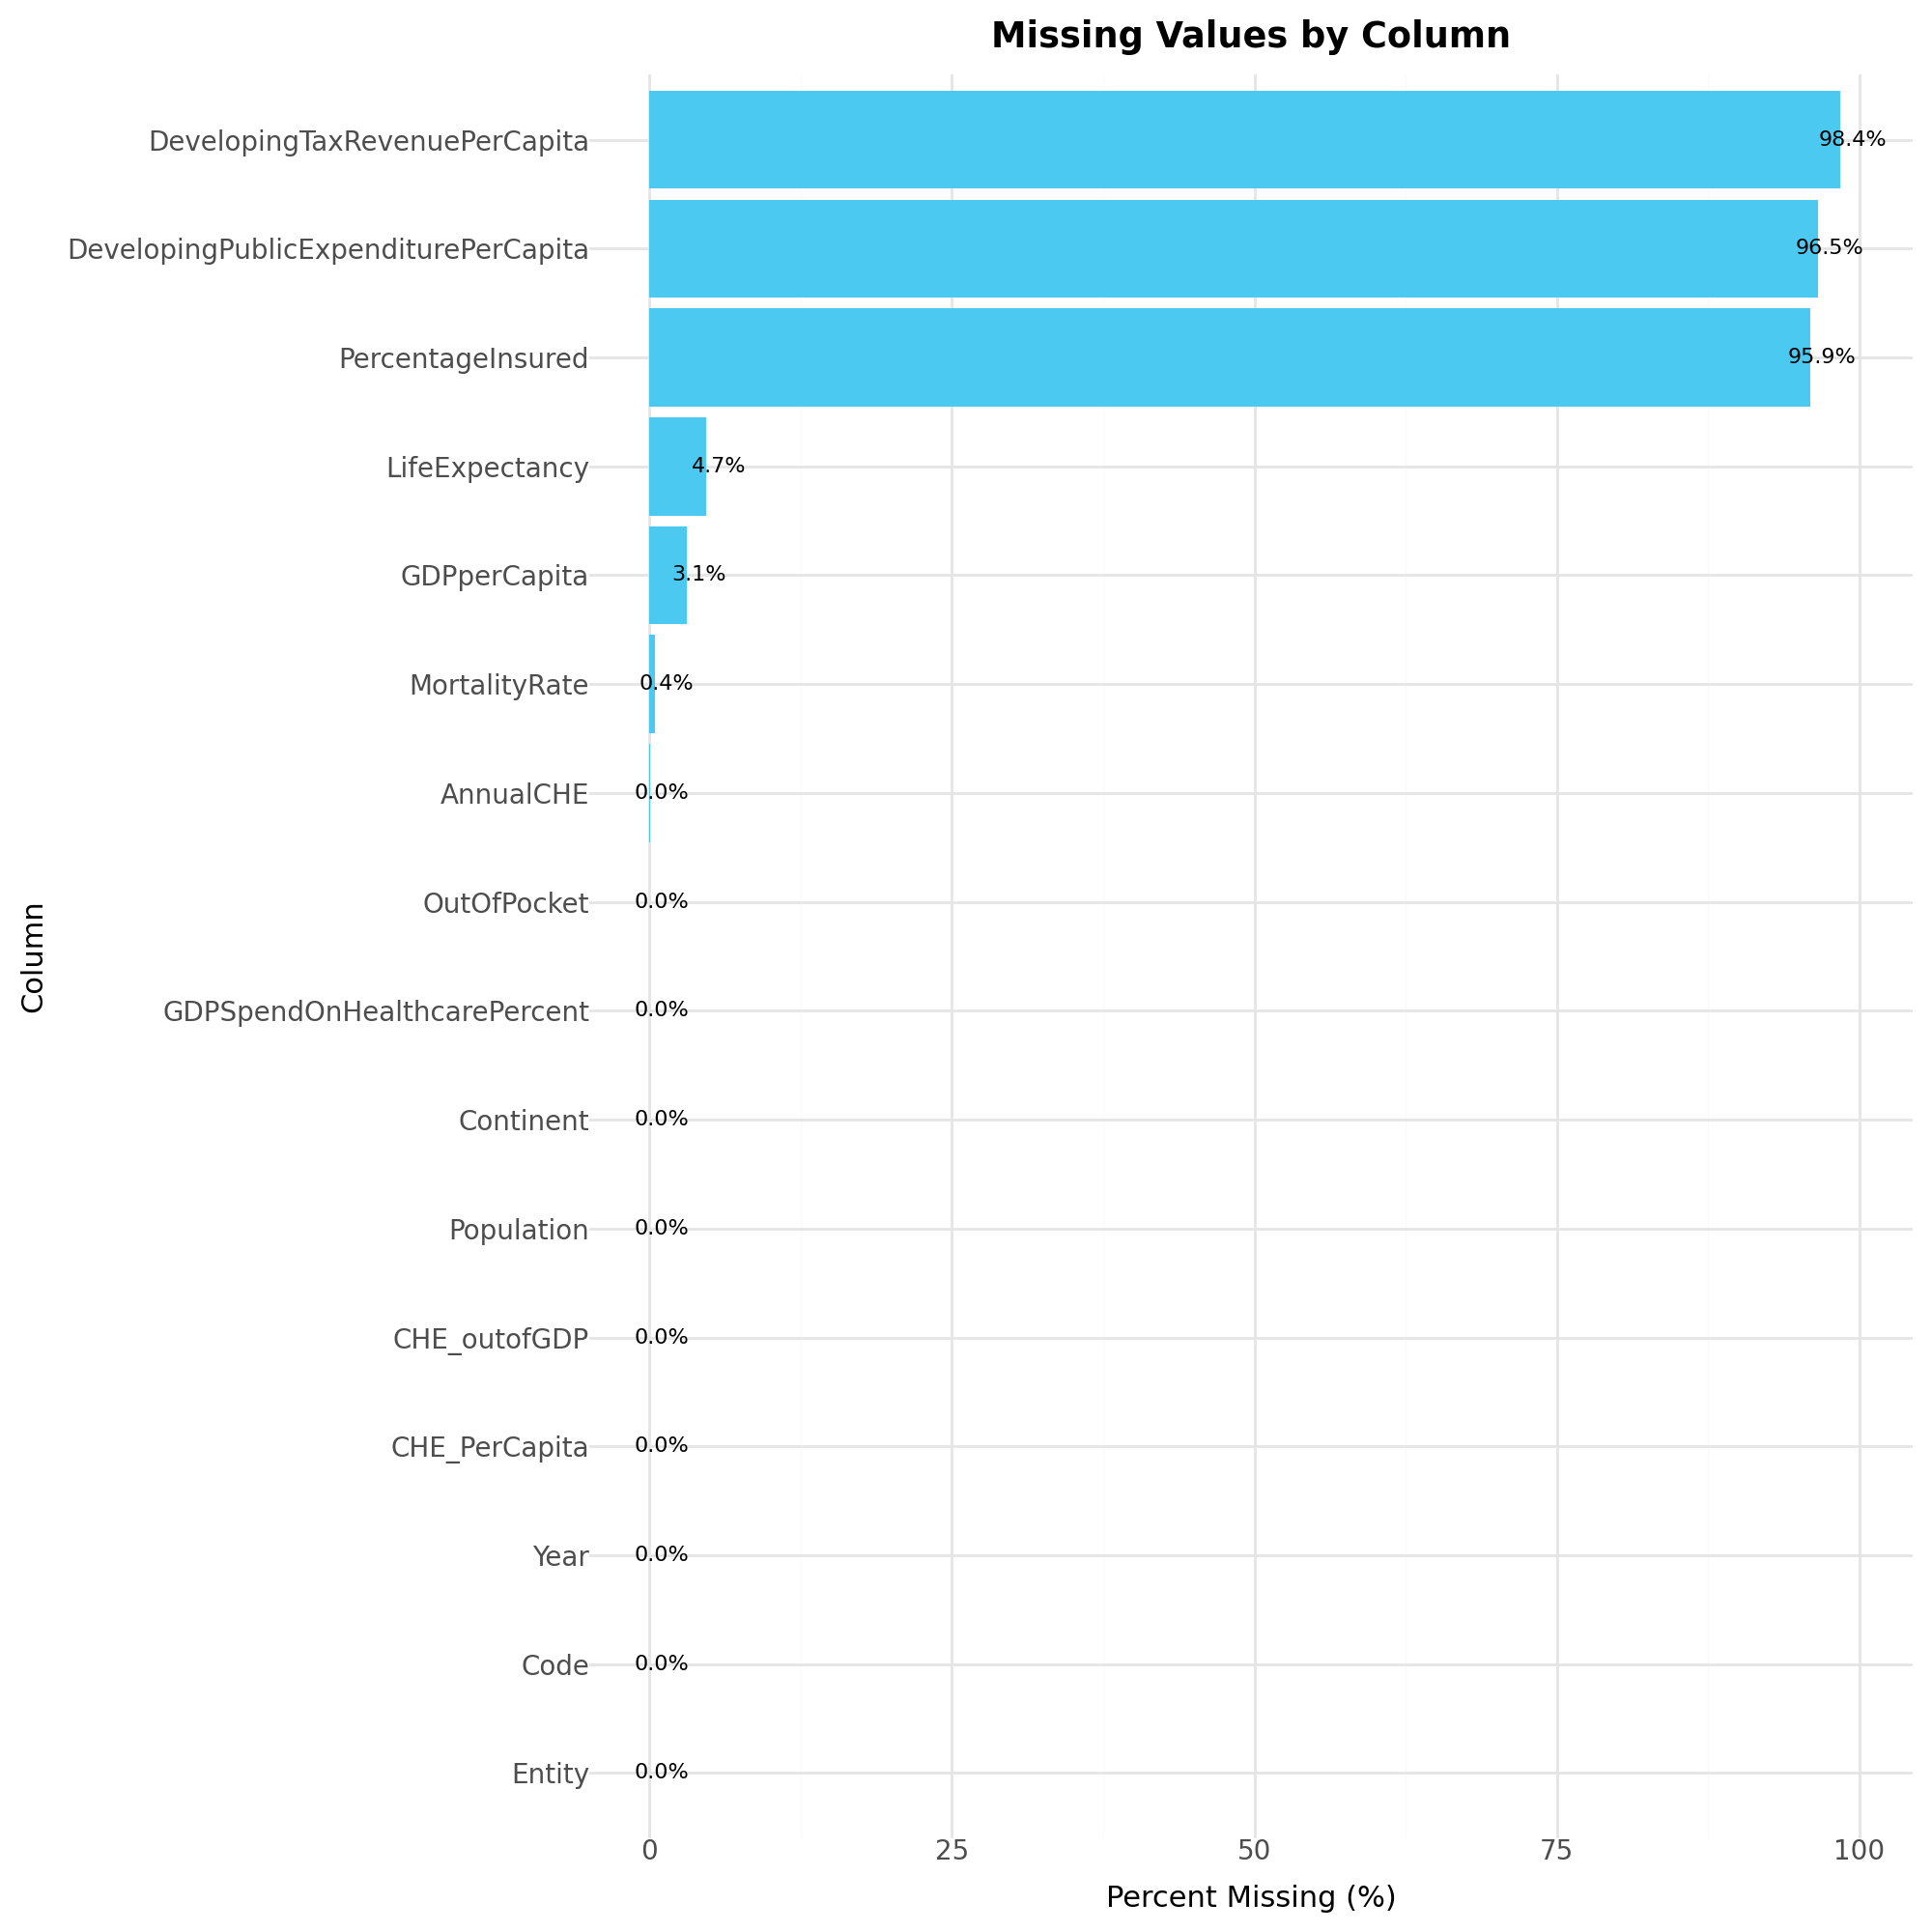

In [13]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, coord_flip, theme_minimal, labs, theme, element_text, geom_text

# Calculate percent missing for each column
missing = (
    df.isnull()
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'index': 'column', 0: 'percent_missing'})
)

# Sort in ascending order to flip top-down later
missing['column'] = pd.Categorical(
    missing['column'],
    categories=missing.sort_values('percent_missing', ascending=True)['column'],
    ordered=True
)


# Plot the results in bar chart
(
ggplot(missing, aes(x='column', y='percent_missing'))
    + geom_bar(stat='identity', fill="#4CC9F0")
    + geom_text(
        aes(label='percent_missing'),
        nudge_y=1,  # Adjusts label position slightly to the right
        size=8,
        format_string='{:.1f}%'  # Shows values with 1 decimal and % sign
    )
    + coord_flip()
    + theme_minimal()
    + labs(
        title='Missing Values by Column',
        x='Column',
        y='Percent Missing (%)'
    )
    + theme(
        figure_size=(10, 10),
        axis_text_y=element_text(size=10),
        axis_text_x=element_text(size=10),
        plot_title=element_text(weight='bold')
    )
)

In [23]:
# Displaying dataframe of PercentagedInsured
filtered_df = df[df["PercentageInsured"].notnull()][["Entity", "Year", "PercentageInsured"]]
with pd.option_context('display.max_rows', None):
    display(filtered_df)

,Entity,Year,PercentageInsured
8,United Arab Emirates,2011,100.0
39,Angola,2010,0.0
78,Albania,2008,23.6
125,Armenia,2009,100.0
133,Australia,2011,100.0
160,Bosnia and Herzegovina,2004,59.2
171,Bolivia,2009,42.7
195,Belize,2009,25.0
220,Bulgaria,2008,87.0
239,Brazil,2009,100.0


In [16]:
#Distinct Entity county confirming each country is only showing a Percentage Insured once in the dataset
with pd.option_context('display.max_rows', None):
    display(filtered_df["Entity"].value_counts().sort_values(ascending=False))

Entity
United Arab Emirates                1
Egypt                               1
Albania                             1
Armenia                             1
Australia                           1
Bosnia and Herzegovina              1
Bolivia                             1
Belize                              1
Bulgaria                            1
Brazil                              1
Belarus                             1
Chile                               1
Switzerland                         1
Cote d'Ivoire                       1
Costa Rica                          1
Germany                             1
Denmark                             1
Benin                               1
Antigua and Barbuda                 1
Ecuador                             1
Belgium                             1
Bhutan                              1
Central African Republic            1
Burkina Faso                        1
Argentina                           1
Azerbaijan                          1
Burun

In [17]:
# List of summary statistics

print(df.describe())

              Year  CHE_PerCapita  CHE_outofGDP    AnnualCHE   GDPperCapita  \
count  3714.000000    3714.000000   3714.000000   3713.00000    3600.000000   
mean   2009.515886    1098.885775      6.210522   1096.54909   16549.098784   
std       5.754834    1406.748588      2.803375   1399.71084   19262.896879   
min    2000.000000       6.930000      1.260000      6.93000     435.076447   
25%    2005.000000     164.412500      4.190000    164.38000    3327.064270   
50%    2010.000000     529.130000      5.700000    529.12000    9584.085449   
75%    2014.000000    1454.270000      7.900000   1445.30000   22887.968750   
max    2019.000000   10921.010000     24.240000  10921.01000  141634.703125   

       MortalityRate  PercentageInsured  DevelopingTaxRevenuePerCapita  \
count    3698.000000         151.000000                      58.000000   
mean        3.876487          61.741060                    1623.128966   
std         4.101469          39.353684                    1139.86

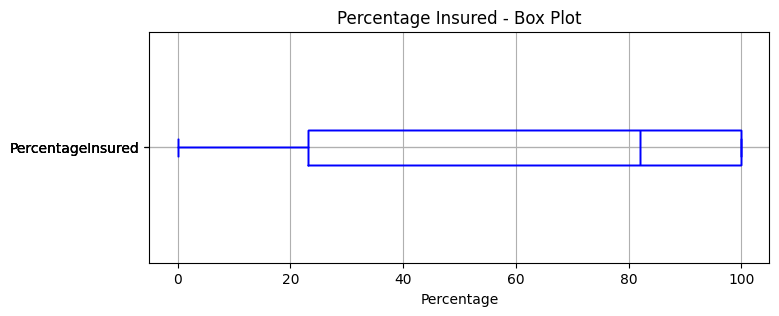

In [25]:
#Visualize the PercentageInsured column as box plot
import matplotlib.pyplot as plt

df['PercentageInsured'].plot.box(
    vert=False, 
    color='blue', 
    grid=True, 
    figsize=(8, 3)
)
plt.title('Percentage Insured - Box Plot')
plt.xlabel('Percentage')
plt.show()

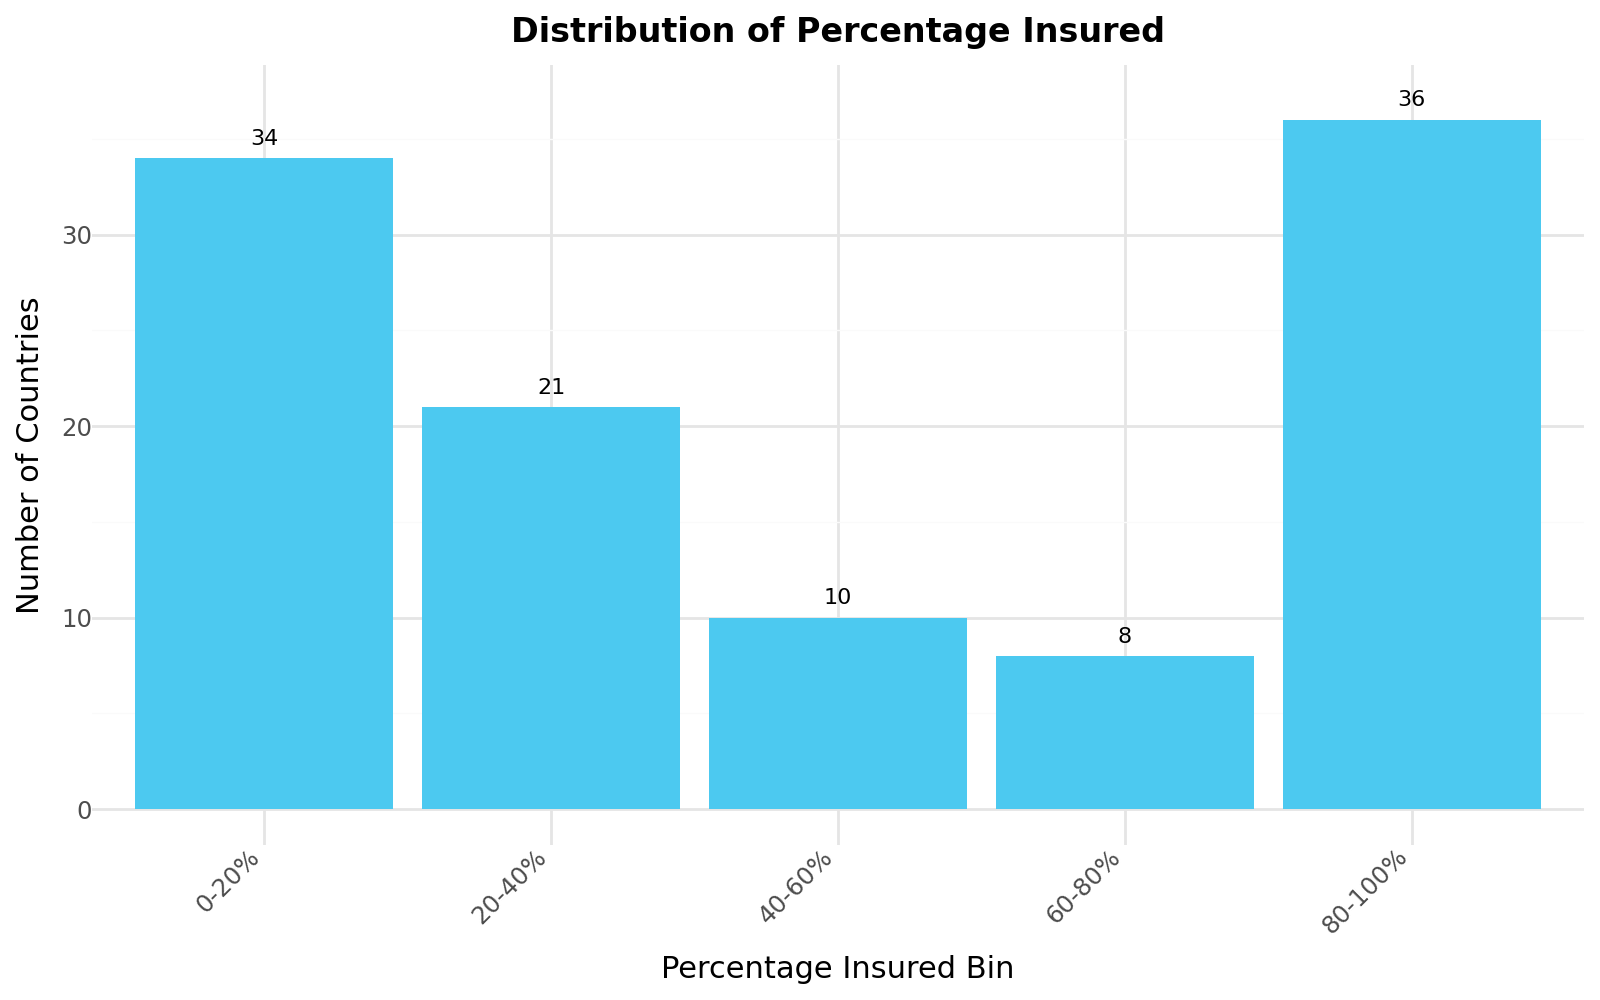

In [24]:
#Creating a bin graph of PercentageInsured. Shows us that about half the countries are either 80-100% or 0-20% insured 

# Step 1: Drop rows where PercentageInsured is missing
df_binned = df[df["PercentageInsured"].notnull()].copy()

# Step 2: Bin values into 20% ranges (0-20, 20-40, ..., 80-100)
df_binned["InsuredBin"] = pd.cut(
    df_binned["PercentageInsured"],
    bins=range(0, 110, 20),  # From 0 up to 100 in steps of 20
    right=False,
    labels=[f"{i}-{i+20}%" for i in range(0, 100, 20)]
)

# Step 3: Count frequency in each bin
insured_counts = df_binned["InsuredBin"].value_counts().sort_index().reset_index()
insured_counts.columns = ["InsuredBin", "Count"]

# Step 4: Plot with plotnine
(
    ggplot(insured_counts, aes(x="InsuredBin", y="Count"))
    + geom_bar(stat="identity", fill="#4CC9F0")
    + geom_text(
        aes(label="Count"),
        nudge_y=1,
        size=8,
        format_string="{:.0f}"
    )
    + theme_minimal()
    + labs(
        title="Distribution of Percentage Insured",
        x="Percentage Insured Bin",
        y="Number of Countries"
    )
    + theme(
        figure_size=(8, 5),
        axis_text_x=element_text(rotation=45, ha='right'),
        plot_title=element_text(weight='bold', size=12)
    )
)


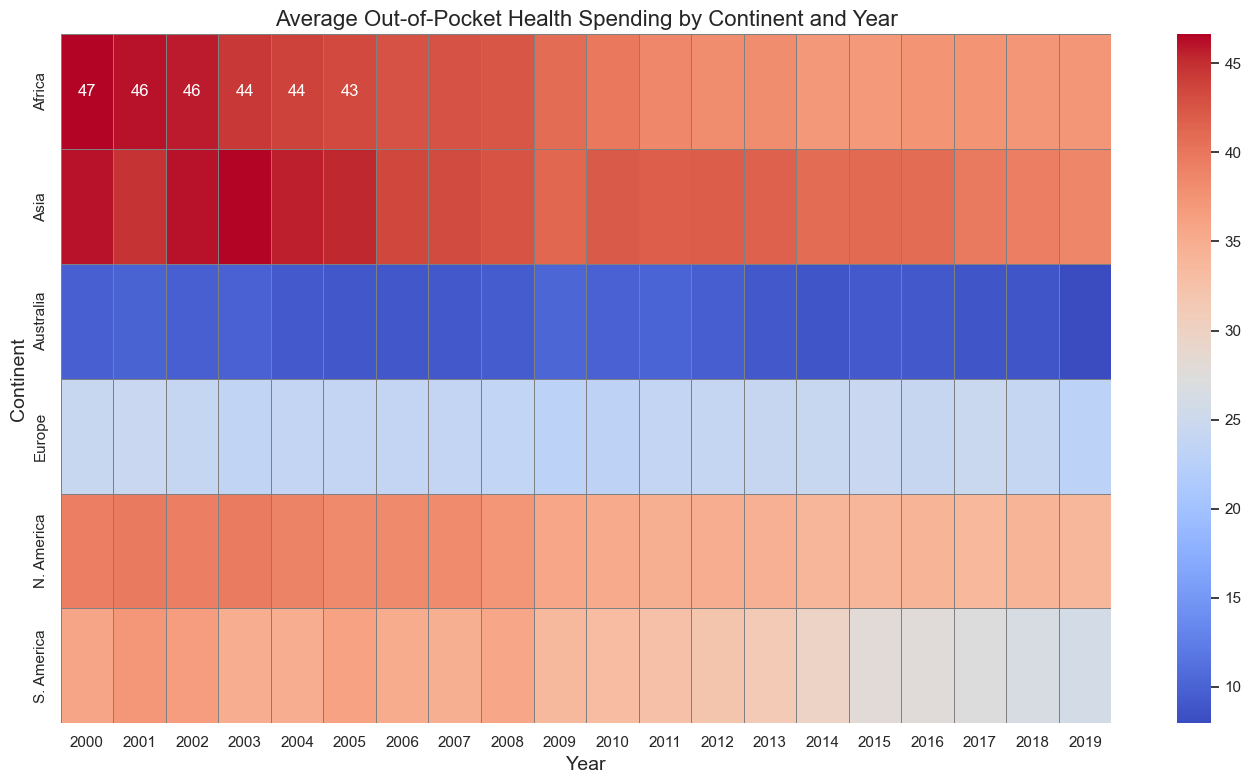

In [29]:

# Step 1: Aggregate out-of-pocket spending by continent and year
agg_df = df.groupby(['Continent', 'Year'], as_index=False)['OutOfPocket'].mean()  # or .sum()

# Step 2: Pivot the cleaned data
heat_df = agg_df.pivot(index="Continent", columns="Year", values="OutOfPocket")

# Step 3: Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(heat_df, cmap="coolwarm", annot=True, fmt=".0f",
            linewidths=0.5, linecolor="gray")

plt.title("Average Out-of-Pocket Health Spending by Continent and Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Continent", fontsize=14)
plt.tight_layout()
plt.show()



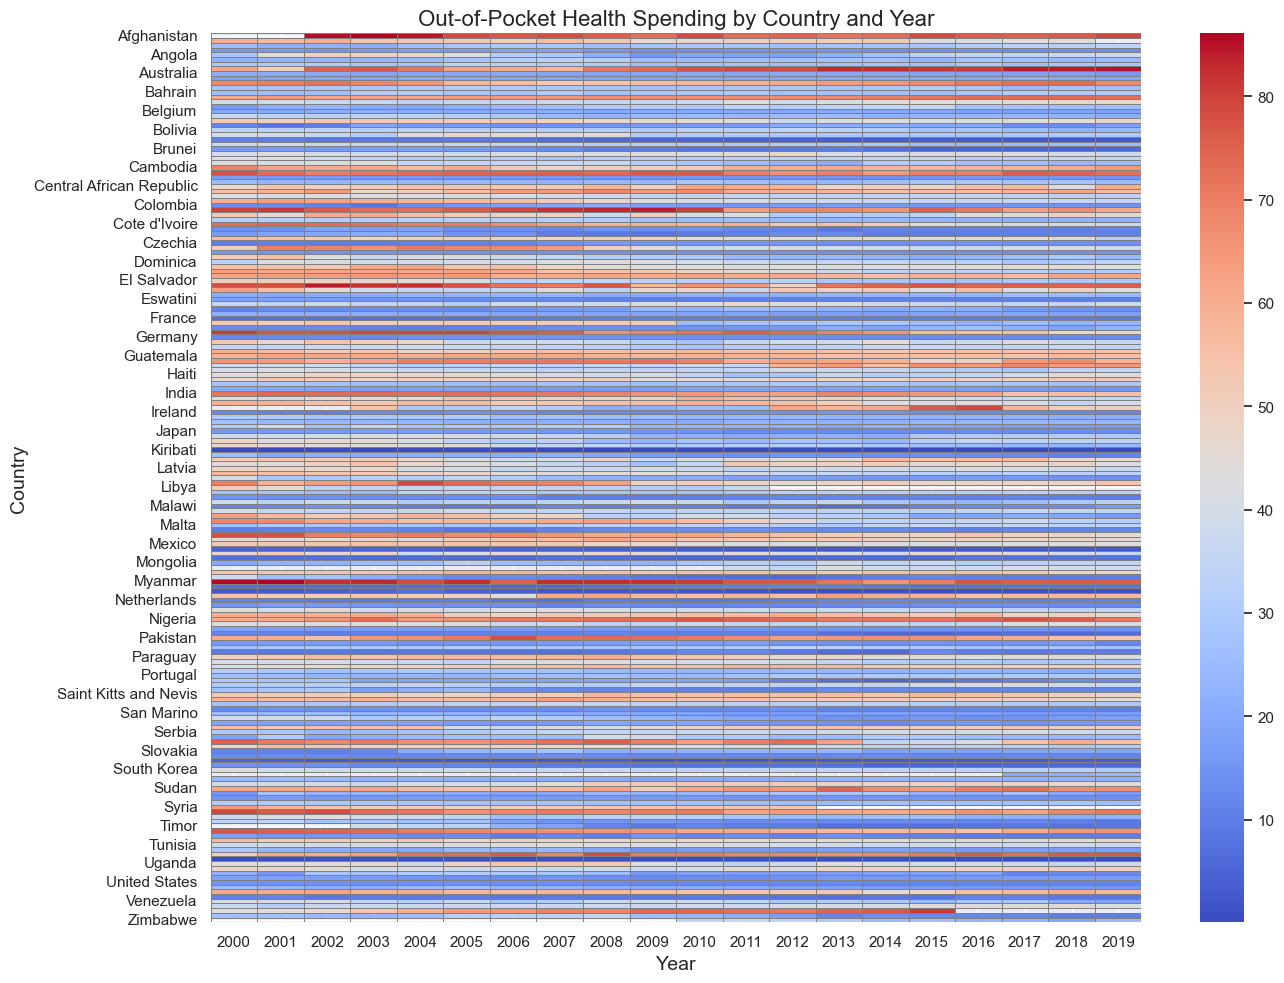

In [30]:
# View out of pocket expense by country

# Check if dataset is empty (To use in Power BI)
if df.empty:
    # Create a placeholder figure
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.text(0.5, 0.5, "Select a continent to display", ha='center', va='center', fontsize=14)
    ax.axis('off')
    plt.show()
else:
    # Your normal plotting logic goes here
    import seaborn as sns
    heat_df = df.pivot(index="Entity", columns="Year", values="OutOfPocket")
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(heat_df, cmap="coolwarm", annot=False, linewidths=0.5, linecolor="gray")
    plt.title("Out-of-Pocket Health Spending by Country and Year", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.tight_layout()
    plt.show()
